<a id="table-of-contents"></a>
# 📖 Table of Contents

- [🗂️ Data Setup](#data-setup)  
- [🛠️ Test Setup](#test-setup)  
- [📈 Assumptions Check](#assumptions-check)  
- [📈 Hypothesis Testing](#hypothesis-testing)  
___

<details><summary><strong>📖 Hypothesis Testing - Assumptions & Methods (Click to Expand)</strong></summary>

<table>
  <thead>
    <tr>
      <th>Test Type</th>
      <th>Use Case</th>
      <th>Parametric?</th>
      <th>Assumptions</th>
      <th>Non-Parametric Alternative</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>One-Sample t-test</td>
      <td>Compare sample mean vs. known value</td>
      <td>✅</td>
      <td>Normality of sample</td>
      <td>Sign test</td>
    </tr>
    <tr>
      <td>Two-Sample t-test</td>
      <td>Compare means of two independent groups</td>
      <td>✅</td>
      <td>- Normality (both groups)<br>- Equal variance (if pooled)<br>- Independence</td>
      <td>Mann-Whitney U</td>
    </tr>
    <tr>
      <td>Paired t-test</td>
      <td>Compare means of two related samples (before-after, matched)</td>
      <td>✅</td>
      <td>- Normality of *differences*<br>- No extreme outliers</td>
      <td>Wilcoxon signed-rank</td>
    </tr>
    <tr>
      <td>Proportions z-test</td>
      <td>Compare binary rates (e.g., CTR in A vs B)</td>
      <td>✅</td>
      <td>- np > 5, nq > 5 (sample size rule)<br>- Independence</td>
      <td>Fisher’s exact</td>
    </tr>
    <tr>
      <td>Chi-Square Test</td>
      <td>Categorical association (e.g., device type vs. AR adoption)</td>
      <td>✅</td>
      <td>- Expected count ≥ 5 in ≥ 80% of cells<br>- Independence</td>
      <td>Fisher’s exact</td>
    </tr>
    <tr>
      <td>ANOVA</td>
      <td>Compare means across 3+ groups</td>
      <td>✅</td>
      <td>- Normality<br>- Equal variance<br>- Independence</td>
      <td>Kruskal-Wallis</td>
    </tr>
    <tr>
      <td>Mann-Whitney U</td>
      <td>Compare medians/ranks of two independent groups</td>
      <td>❌</td>
      <td>- Same shape distribution (ideally)<br>- Ordinal or continuous data</td>
      <td>N/A</td>
    </tr>
    <tr>
      <td>Wilcoxon Signed-Rank</td>
      <td>Paired version of Mann-Whitney (for related samples)</td>
      <td>❌</td>
      <td>- Symmetry in differences<br>- Ordinal or continuous</td>
      <td>Sign test</td>
    </tr>
  </tbody>
</table>

</details>


<a id="test-setup"></a>

# 🛠️ Test Setup


<details><summary><strong>📖 Test Settings Explanation (Click to Expand)</strong></summary>

### 📊 **Test Type (test_type)**
This setting defines the type of test you want to perform.

- **one_sample**: Comparing the sample mean against a known value (e.g., a population mean).
- **two_sample**: Comparing the means of two independent groups (e.g., A vs B).
- **paired**: Comparing means from the same group at two different times (before vs after).
- **proportions**: Comparing proportions (e.g., the conversion rates of two groups).

**Example**: You might want to test if the mean age of two groups of people (Group A and Group B) differs, or if the proportion of people who converted in each group is different.

### 📏 **Tail Type (tail_type)**
This setting determines whether you are performing a one-tailed or two-tailed test.

- **one_tailed**: You are testing if the value is greater than or less than the reference value (directional).
- **two_tailed**: You are testing if the value is different from the reference value, either higher or lower (non-directional).

**Example**:  
- **One-tailed**: Testing if new treatment increases sales (you only care if it's greater).  
- **Two-tailed**: Testing if there is any difference in sales between two treatments (it could be either an increase or decrease).

### 🧮 **Parametric (parametric)**
This setting indicates whether the test is **parametric** or **non-parametric**.

- **True (Parametric)**: This means we assume that the data follows a certain distribution, often a **normal distribution**. The most common parametric tests are **t-tests** and **z-tests**. Parametric tests are generally more powerful if the assumptions are met.
  
- **False (Non-Parametric)**: Non-parametric tests don’t assume any specific distribution. These are used when the data doesn’t follow a normal distribution or when the sample size is small. Examples include **Mann-Whitney U** (alternative to the t-test) and **Wilcoxon Signed-Rank** (alternative to paired t-test).

**Why does this matter?**  
Parametric tests tend to be more powerful because they make assumptions about the distribution of the data (e.g., normality). Non-parametric tests are more flexible and can be used when these assumptions are not met, but they may be less powerful.

### 📊 **Equal Variance (equal_variance)**
This setting is used specifically for **two-sample t-tests**.

- **True**: Assumes that the two groups have **equal variances** (i.e., the spread of data is the same in both groups). This is used for the **pooled t-test**.
  
- **False**: Assumes the two groups have **different variances**. This is used for the **Welch t-test**, which is more robust when the assumption of equal variances is violated.

**Why is this important?**  
If the variances are not equal, using a pooled t-test (which assumes equal variance) can lead to incorrect conclusions. The Welch t-test is safer when in doubt about the equality of variances.

### 🔑 **Significance Level (alpha)**
The **alpha** level is your **threshold for statistical significance**.

- Commonly set at **0.05**, this means that you are willing to accept a 5% chance of wrongly rejecting the null hypothesis (i.e., a 5% chance of a Type I error).
  
- If the **p-value** (calculated from your test) is less than **alpha**, you reject the null hypothesis. If it's greater than alpha, you fail to reject the null hypothesis.

**Example**:  
- **alpha = 0.05** means there’s a 5% risk of concluding that a treatment has an effect when it actually doesn’t.

### 🎯 **Putting It All Together**

For instance, let's say you're testing if a new feature (Group A) increases user engagement compared to the existing feature (Group B). Here’s how each configuration works together:

- **test_type** = `'two_sample'`: You're comparing two independent groups (A vs B).
- **tail_type** = `'two_tailed'`: You’re testing if there’s any difference (increase or decrease) in engagement.
- **parametric** = `True`: You assume the data is normally distributed, so a t-test will be appropriate.
- **equal_variance** = `True`: You assume the two groups have equal variance, so you’ll use a pooled t-test.
- **alpha** = `0.05`: You’re using a 5% significance level for your hypothesis test.

</details>


In [1]:
# -------------------------
# CONFIGURATION SETUP
# -------------------------
config = {
    'test_type': 'two_sample',         # one_sample, two_sample, paired, proportions
    'tail_type': 'two_tailed',         # one_tailed or two_tailed
    'parametric': True,                # True = t-test/z-test, False = non-parametric
    'equal_variance': True,            # Used in two-sample t-test (pooled vs Welch)
    'alpha': 0.05                      # Significance level
}
config

{'test_type': 'two_sample',
 'tail_type': 'two_tailed',
 'parametric': True,
 'equal_variance': True,
 'alpha': 0.05}

[Back to the top](#table-of-contents)
___


<a id="data-setup"></a>
# 🗂️ Data Setup

In [3]:
import numpy as np
import pandas as pd

# Simulated Example: Session duration (in minutes)
group_A = np.random.normal(loc=5.2, scale=1.1, size=100)
group_B = np.random.normal(loc=5.7, scale=1.3, size=100)
data = pd.DataFrame({
    'group': ['A'] * len(group_A) + ['B'] * len(group_B),
    'value': np.concatenate([group_A, group_B])
})
data

,group,value
0,A,2.336800
1,A,4.754953
2,A,6.816619
3,A,6.793577
4,A,5.709621
...,...,...
195,B,6.870548
196,B,5.261823
197,B,6.502157
198,B,3.808016


[Back to the top](#table-of-contents)
___


<a id="assumptions-check"></a>

# 📈 Assumptions Check


🔍 Assumption Checks
Normality (Shapiro-Wilk): A p=0.230, B p=0.644
Equal Variance (Levene's): p=0.876



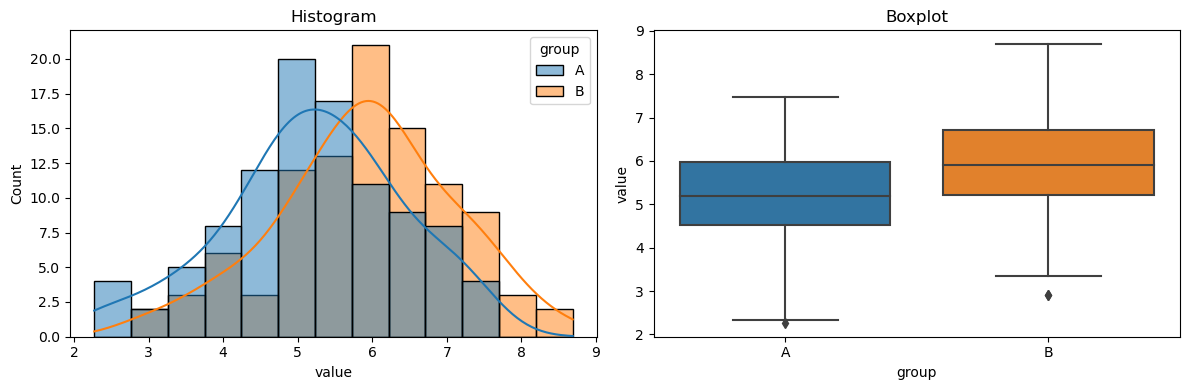

In [4]:
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns

print("\n🔍 Assumption Checks")

# Normality check
_, p_A = shapiro(group_A)
_, p_B = shapiro(group_B)
print(f"Normality (Shapiro-Wilk): A p={p_A:.3f}, B p={p_B:.3f}")

# Variance check
_, p_var = levene(group_A, group_B)
print(f"Equal Variance (Levene's): p={p_var:.3f}\n")

# Visuals
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data, x='value', hue='group', kde=True, ax=axs[0])
axs[0].set_title('Histogram')
sns.boxplot(data=data, x='group', y='value', ax=axs[1])
axs[1].set_title('Boxplot')
plt.tight_layout()
plt.show()


[Back to the top](#table-of-contents)
___


<a id="hypothesis-testing"></a>

<h1>🧪 Hypothesis Testing</h1>



In [5]:
def run_hypothesis_test(cfg, data):
    from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu, wilcoxon
    from statsmodels.stats.proportion import proportions_ztest

    A = data[data['group'] == 'A']['value']
    B = data[data['group'] == 'B']['value']

    tail = cfg['tail_type']
    alpha = cfg['alpha']

    print("\n🧪 Running Hypothesis Test")

    if cfg['test_type'] == 'two_sample':
        if cfg['parametric']:
            stat, p = ttest_ind(A, B, equal_var=cfg['equal_variance'])
        else:
            stat, p = mannwhitneyu(A, B)
    elif cfg['test_type'] == 'paired':
        if cfg['parametric']:
            stat, p = ttest_rel(A, B)
        else:
            stat, p = wilcoxon(A, B)
    elif cfg['test_type'] == 'proportions':
        # Binary conversion case
        count = np.array([A.sum(), B.sum()])
        nobs = np.array([len(A), len(B)])
        stat, p = proportions_ztest(count, nobs)
    else:
        print("Unsupported test_type")
        return

    # Adjust for one-tailed
    if tail == 'one_tailed':
        p = p / 2 if stat > 0 else 1 - (p / 2)

    print(f"Test Statistic: {stat:.3f}  |  p-value: {p:.4f}")

    if p < alpha:
        print(f"✅ Reject Null Hypothesis (p < {alpha})")
    else:
        print(f"❌ Fail to Reject Null Hypothesis (p >= {alpha})")


In [6]:
run_hypothesis_test(config, data)



🧪 Running Hypothesis Test
Test Statistic: -4.092  |  p-value: 0.0001
✅ Reject Null Hypothesis (p < 0.05)


[Back to the top](#table-of-contents)
___
